In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np


In [3]:
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [14]:
#For reading stock from Yahoo
import pandas_datareader
from pandas_datareader import data as pdr

In [15]:
#For timestamp
from datetime import datetime

In [16]:
#Technology stocks used in the project
tech_list = ['AAPL','GOOG','MSFT','AMZN']

#Set start time and end time for data grab
end_date = datetime.now()
start_date = datetime(end_date.year-1, end_date.month, end_date.day)

#Grab stock prices from yahoo finance
for stock in tech_list:
    data = pdr.DataReader(stock,'yahoo',start_date, end_date)
    
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = pdr.DataReader(stock,'yahoo',start_date,end_date)

In [17]:
#Summary status
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,154.477171,155.464622,153.457690,154.548406,153.643245,2.731294e+07
std,13.165188,13.252117,12.973074,13.087294,13.656883,1.144339e+07
min,120.930000,121.389999,120.620003,121.349998,119.429459,1.402670e+07
25%,143.915001,144.675003,143.184998,143.864998,142.440361,2.034815e+07
50%,154.000000,154.720001,153.309998,153.949997,152.840561,2.440950e+07
75%,163.775002,164.385002,163.044999,163.675003,163.088723,3.073265e+07
max,179.369995,180.100006,178.250000,179.259995,179.259995,1.119850e+08


In [18]:
#General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-30 to 2018-01-26
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


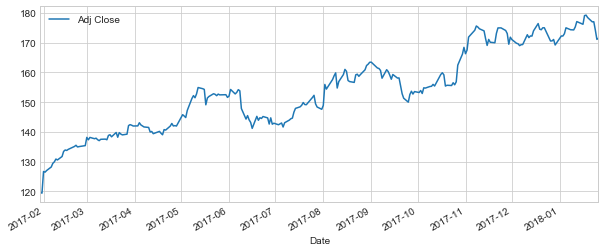

In [19]:
#Historical view of closing price
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

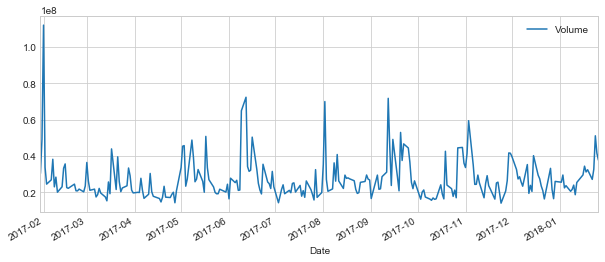

In [20]:
#Total volume of stock traded each day over the past one year
AAPL['Volume'].plot(legend=True, figsize=(10,4))

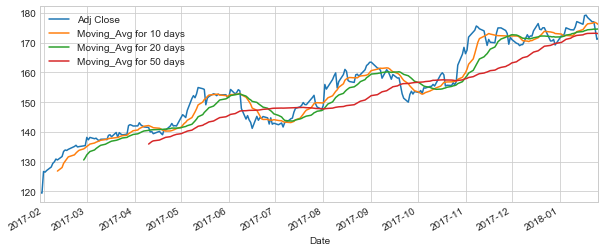

In [27]:
#Plot moving average
moving_average_day = [10,20,50]
moving_average_day_df = pd.DataFrame(moving_average_day)

for day in moving_average_day_df:
    column_name = "Moving_Avg for %s days" %(str(day))
    AAPL[column_name]=AAPL['Adj Close'].rolling(window=day, center=False).mean()
    
AAPL[['Adj Close','Moving_Avg for 10 days','Moving_Avg for 20 days','Moving_Avg for 50 days']].plot(subplots=False, figsize=(10,4))

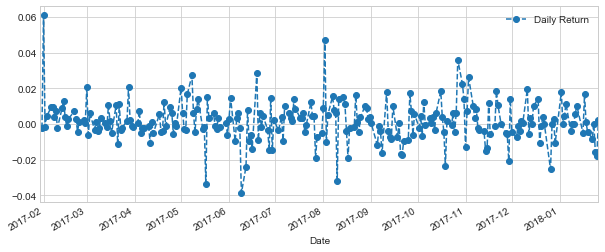

In [28]:
#Calculate percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

#Plot daily change
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

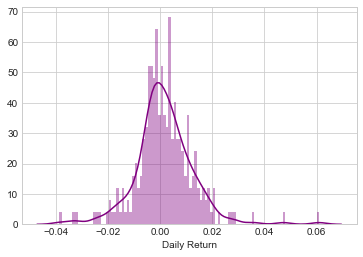

In [29]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
#AAPL['Daily Return'].hist()


In [32]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start_date,end_date)['Adj Close']

In [33]:
# Let's take a quick look
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-01-26,171.509995,1402.050049,1175.839966,94.059998
2018-01-25,171.110001,1377.949951,1170.369995,92.330002
2018-01-24,174.220001,1357.510010,1164.239990,91.820000
2018-01-23,177.039993,1362.540039,1169.969971,91.900002
2018-01-22,177.000000,1327.310059,1155.810059,91.610001


In [34]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

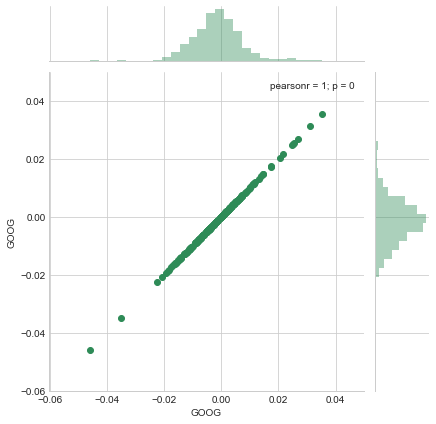

In [35]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

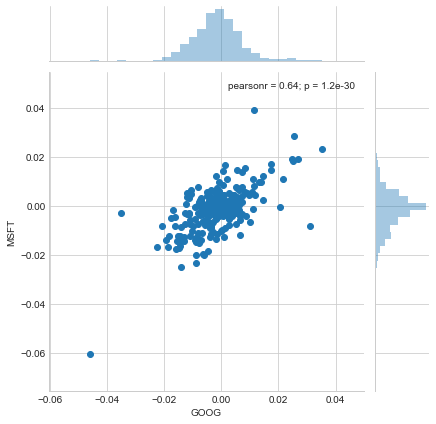

In [36]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

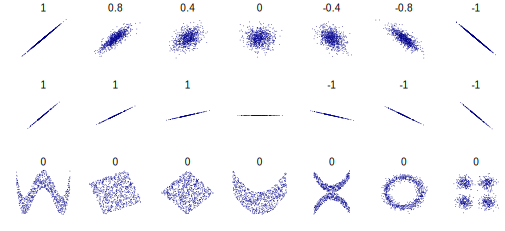

In [37]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

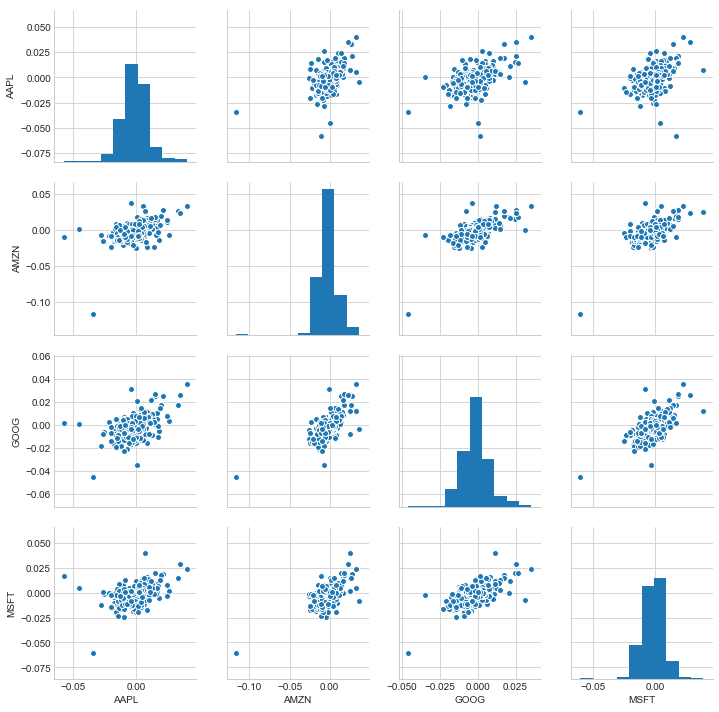

In [38]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

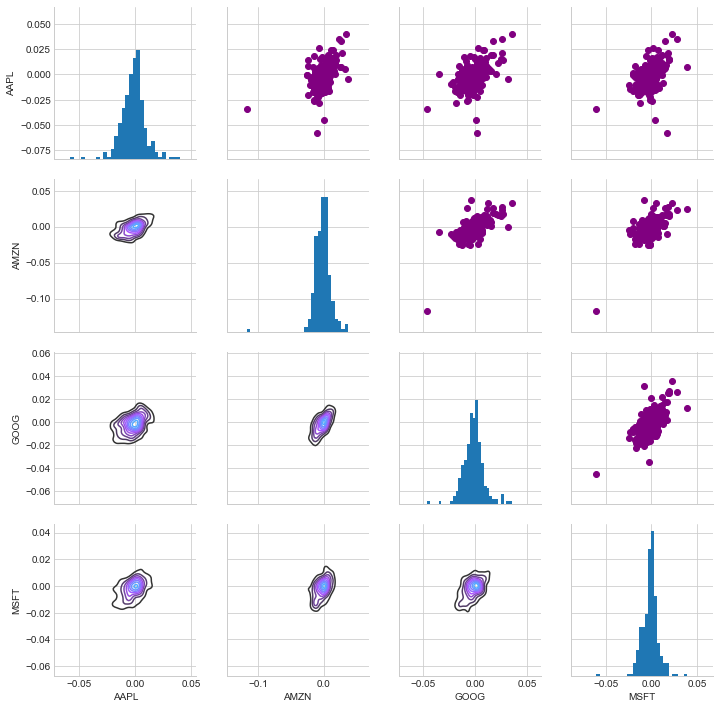

In [39]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


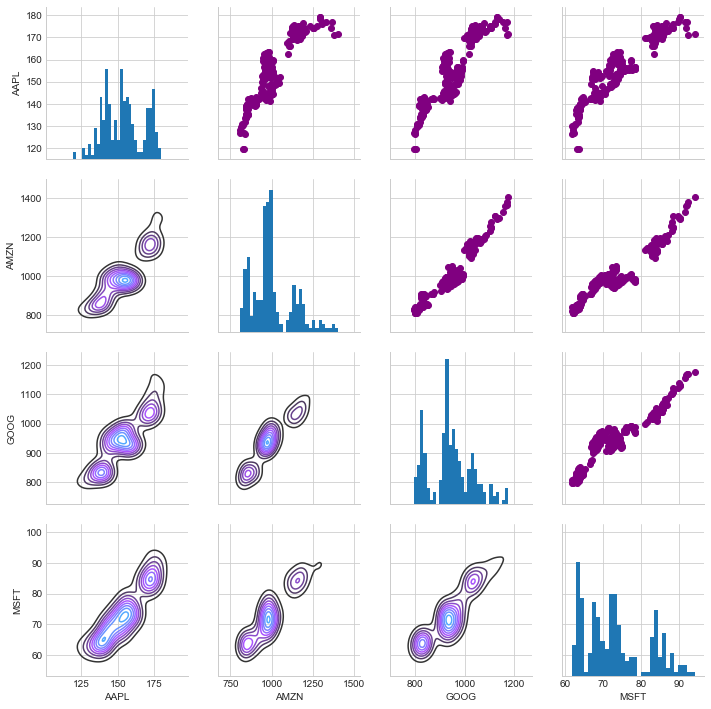

In [40]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)


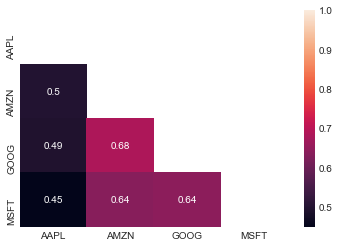

In [49]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
correlation = tech_rets.dropna().corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation, annot=True, mask=mask)

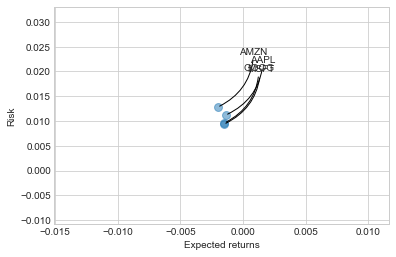

In [52]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [53]:
#Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [57]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Shock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

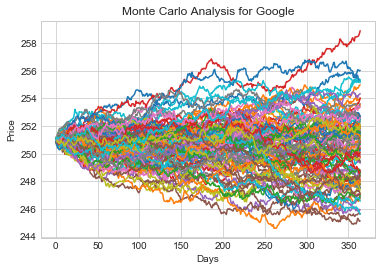

In [62]:
# Get start price from GOOG.head()
start_price = 251

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [63]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

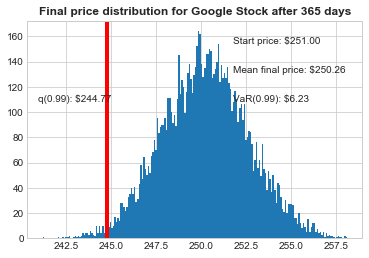

In [64]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [65]:
#Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $6.23 for every investment of 251 (the price of one inital google stock).
#This basically menas for every initial stock you purchase your putting about $6.23 at risk 99% of the time from our Monte Carlo Simulation.
